In [1]:
import pandas as pd
import numpy as np

### Variable Information:

Anonymous Customer ID
Call Failures: number of call failures
Complains: binary (0: No complaint, 1: complaint)
Subscription Length: total months of subscription
Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
Seconds of Use: total seconds of calls
Frequency of use: total number of calls
Frequency of SMS: total number of text messages
Distinct Called Numbers: total number of distinct phone calls
Age Group: ordinal attribute (1: younger age, 5: older age)
Tariff Plan: binary (1: Pay as you go, 2: contractual)
Status: binary (1: active, 2: non-active)
Churn: binary (1: churn, 0: non-churn) - Class label
Customer Value: The calculated value of customer

In [2]:
data = pd.read_csv('Customer Churn.csv')
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
data.shape

(3150, 14)

In [4]:
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [5]:
data.duplicated().sum()

300

In [6]:
data.drop_duplicates(inplace=True)
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3097,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3099,8,1,11,2,1792,25,7,9,3,1,1,30,100.680,1
3123,26,0,38,9,10740,99,8,44,5,2,1,55,174.585,0


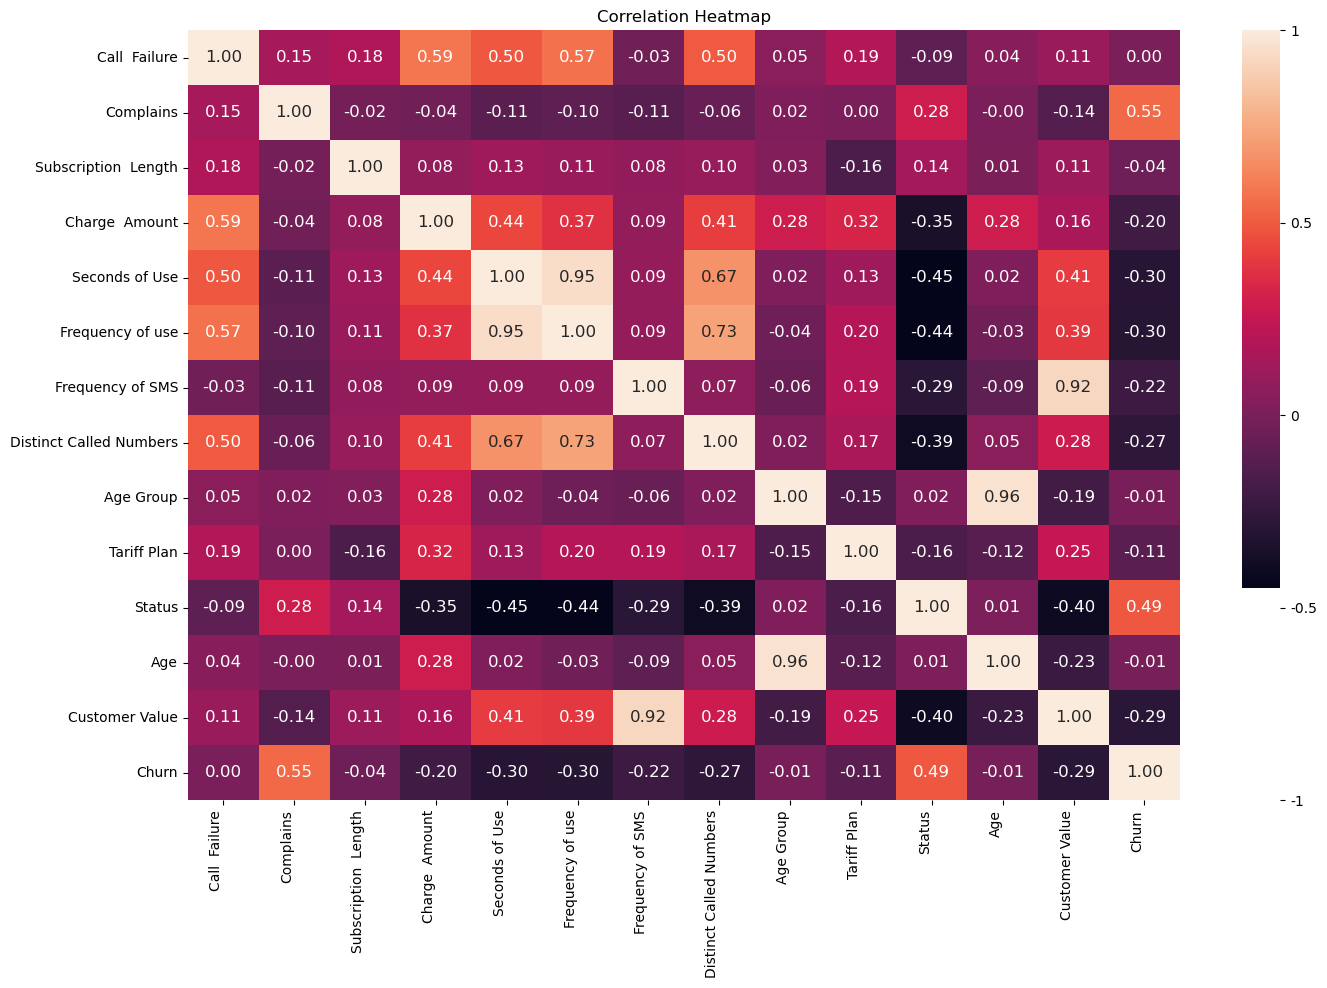

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(data.corr(), annot=True, fmt='.2f', linecolor='grey', annot_kws={"size": 12})
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0);

In [8]:
data.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.149564,0.177206,0.585442,0.495463,0.567096,-0.031926,0.498604,0.049340,0.187537,-0.094090,0.043799,0.110228,0.003310
Complains,0.149564,1.000000,-0.019229,-0.035887,-0.108934,-0.095519,-0.114729,-0.061314,0.015761,0.002461,0.282928,-0.000400,-0.136989,0.546055
Subscription Length,0.177206,-0.019229,1.000000,0.084275,0.127184,0.109148,0.080530,0.099215,0.030078,-0.160538,0.144235,0.005900,0.113184,-0.037984
Charge Amount,0.585442,-0.035887,0.084275,1.000000,0.443585,0.372646,0.085781,0.413897,0.282761,0.321193,-0.353311,0.283466,0.161852,-0.201662
Seconds of Use,0.495463,-0.108934,0.127184,0.443585,1.000000,0.945144,0.093073,0.671973,0.015253,0.127793,-0.449660,0.019383,0.408536,-0.295999
Frequency of use,0.567096,-0.095519,0.109148,0.372646,0.945144,1.000000,0.090712,0.731204,-0.039523,0.199873,-0.440601,-0.031574,0.394647,-0.298608
Frequency of SMS,-0.031926,-0.114729,0.080530,0.085781,0.093073,0.090712,1.000000,0.069717,-0.056859,0.193785,-0.288049,-0.093235,0.922852,-0.218894
Distinct Called Numbers,0.498604,-0.061314,0.099215,0.413897,0.671973,0.731204,0.069717,1.000000,0.015562,0.167037,-0.393052,0.049187,0.275447,-0.270343
Age Group,0.049340,0.015761,0.030078,0.282761,0.015253,-0.039523,-0.056859,0.015562,1.000000,-0.153496,0.020048,0.960877,-0.193461,-0.005891
Tariff Plan,0.187537,0.002461,-0.160538,0.321193,0.127793,0.199873,0.193785,0.167037,-0.153496,1.000000,-0.163083,-0.120429,0.249999,-0.106000


In [9]:
correlation = data.corr()

# Sort correlation coefficients (excluding self-correlations)
sorted_corr = correlation.where(~np.tril(np.ones(correlation.shape)).astype(bool))
sorted_corr = abs(sorted_corr.stack())
sorted_corr.sort_values(ascending=False, inplace=True)

# Print correlations in descending order
print("Correlation Matrix (Descending Order):")
print(sorted_corr.to_string())

Correlation Matrix (Descending Order):
Age Group                Age                        0.960877
Seconds of Use           Frequency of use           0.945144
Frequency of SMS         Customer Value             0.922852
Frequency of use         Distinct Called Numbers    0.731204
Seconds of Use           Distinct Called Numbers    0.671973
Call  Failure            Charge  Amount             0.585442
                         Frequency of use           0.567096
Complains                Churn                      0.546055
Call  Failure            Distinct Called Numbers    0.498604
                         Seconds of Use             0.495463
Status                   Churn                      0.492867
Seconds of Use           Status                     0.449660
Charge  Amount           Seconds of Use             0.443585
Frequency of use         Status                     0.440601
Charge  Amount           Distinct Called Numbers    0.413897
Seconds of Use           Customer Value       

In [10]:
np.abs(data.corr()[['Customer Value']]).sort_values(by='Customer Value',ascending=False)

,Customer Value
Customer Value,1.000000
Frequency of SMS,0.922852
Seconds of Use,0.408536
Status,0.403568
Frequency of use,0.394647
Churn,0.287078
Distinct Called Numbers,0.275447
Tariff Plan,0.249999
Age,0.227174
Age Group,0.193461


In [11]:
np.abs(data.corr()[['Churn']]).sort_values(by='Churn',ascending=False)

,Churn
Churn,1.000000
Complains,0.546055
Status,0.492867
Frequency of use,0.298608
Seconds of Use,0.295999
Customer Value,0.287078
Distinct Called Numbers,0.270343
Frequency of SMS,0.218894
Charge Amount,0.201662
Tariff Plan,0.106000


In [12]:
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,0.080702,32.452982,0.974737,4534.243158,70.484912,73.789825,23.870526,2.835088,1.080351,1.240000,31.077193,474.990367,0.156491
std,7.326172,0.272424,8.723075,1.550618,4199.712303,57.401512,112.062397,17.193929,0.893503,0.271883,0.427158,8.861934,514.442198,0.363384
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1458.750000,28.000000,7.000000,11.000000,2.000000,1.000000,1.000000,25.000000,117.527500,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3041.000000,54.500000,22.000000,21.000000,3.000000,1.000000,1.000000,30.000000,232.520000,0.000000
75%,12.000000,0.000000,38.000000,2.000000,6500.000000,96.000000,88.000000,34.000000,3.000000,1.000000,1.000000,30.000000,790.080000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [13]:
len(data.columns)

14

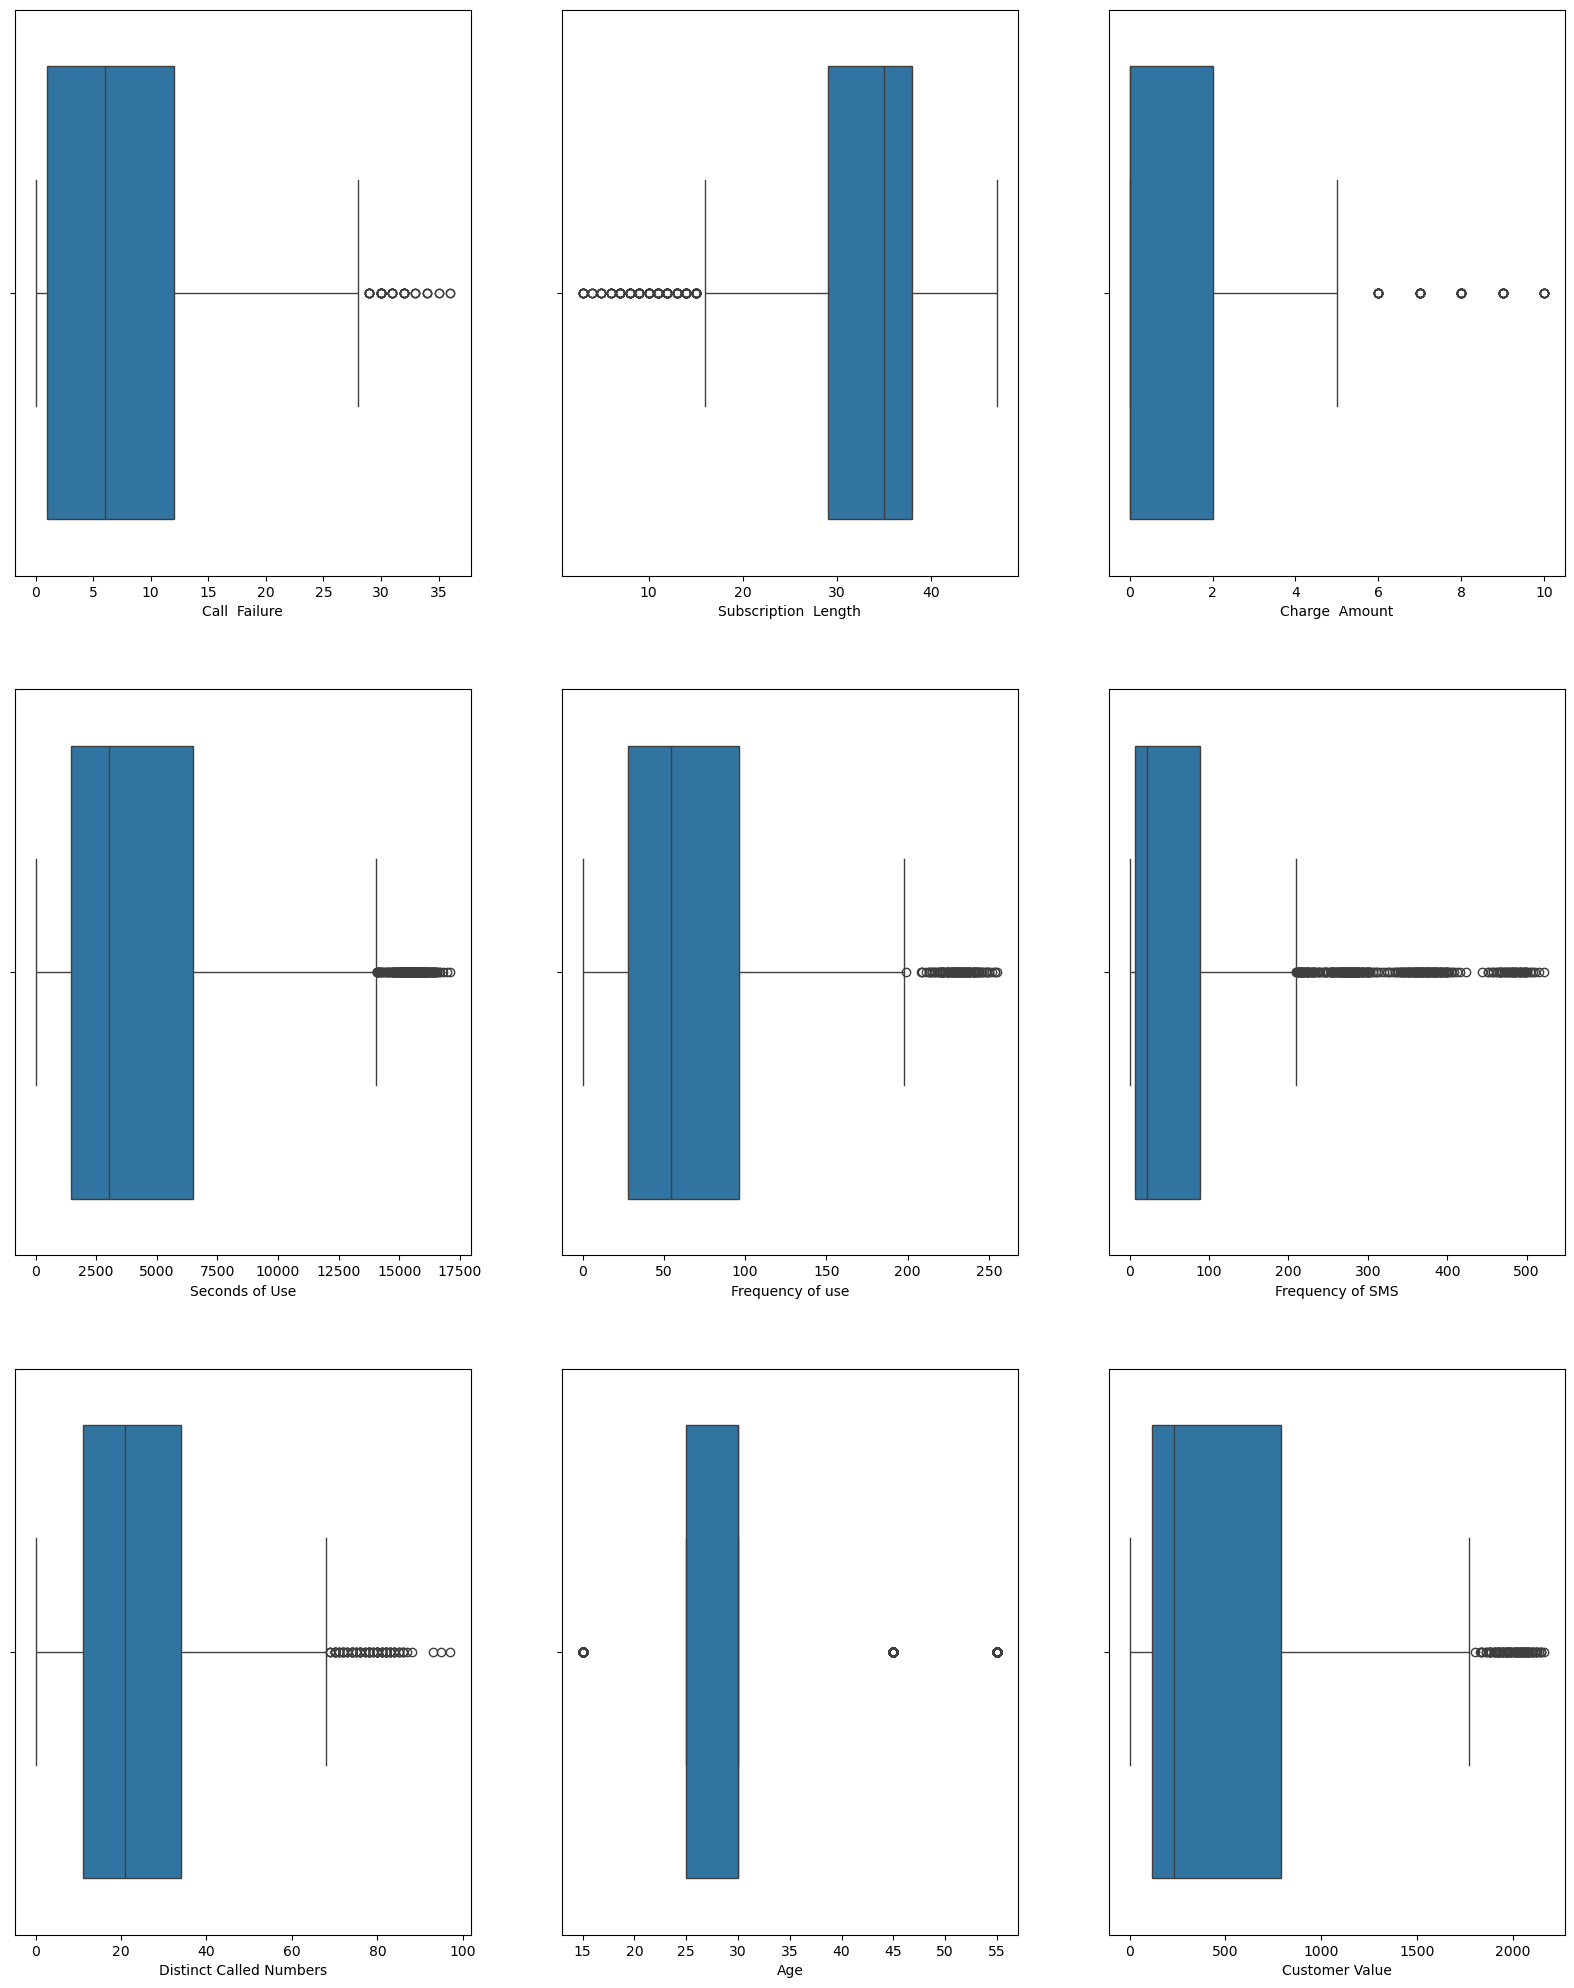

In [14]:
plt.figure(figsize=(20, 25))
i=1
for f in data.drop(['Complains','Tariff Plan','Status','Churn','Age Group'],axis=1).columns:
    plt.subplot(3,3,i)
    sns.boxplot(data=data,x=f)
    i+=1

C:\Users\PC\AppData\Local\Temp\ipykernel_29880\4033768741.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=axes);


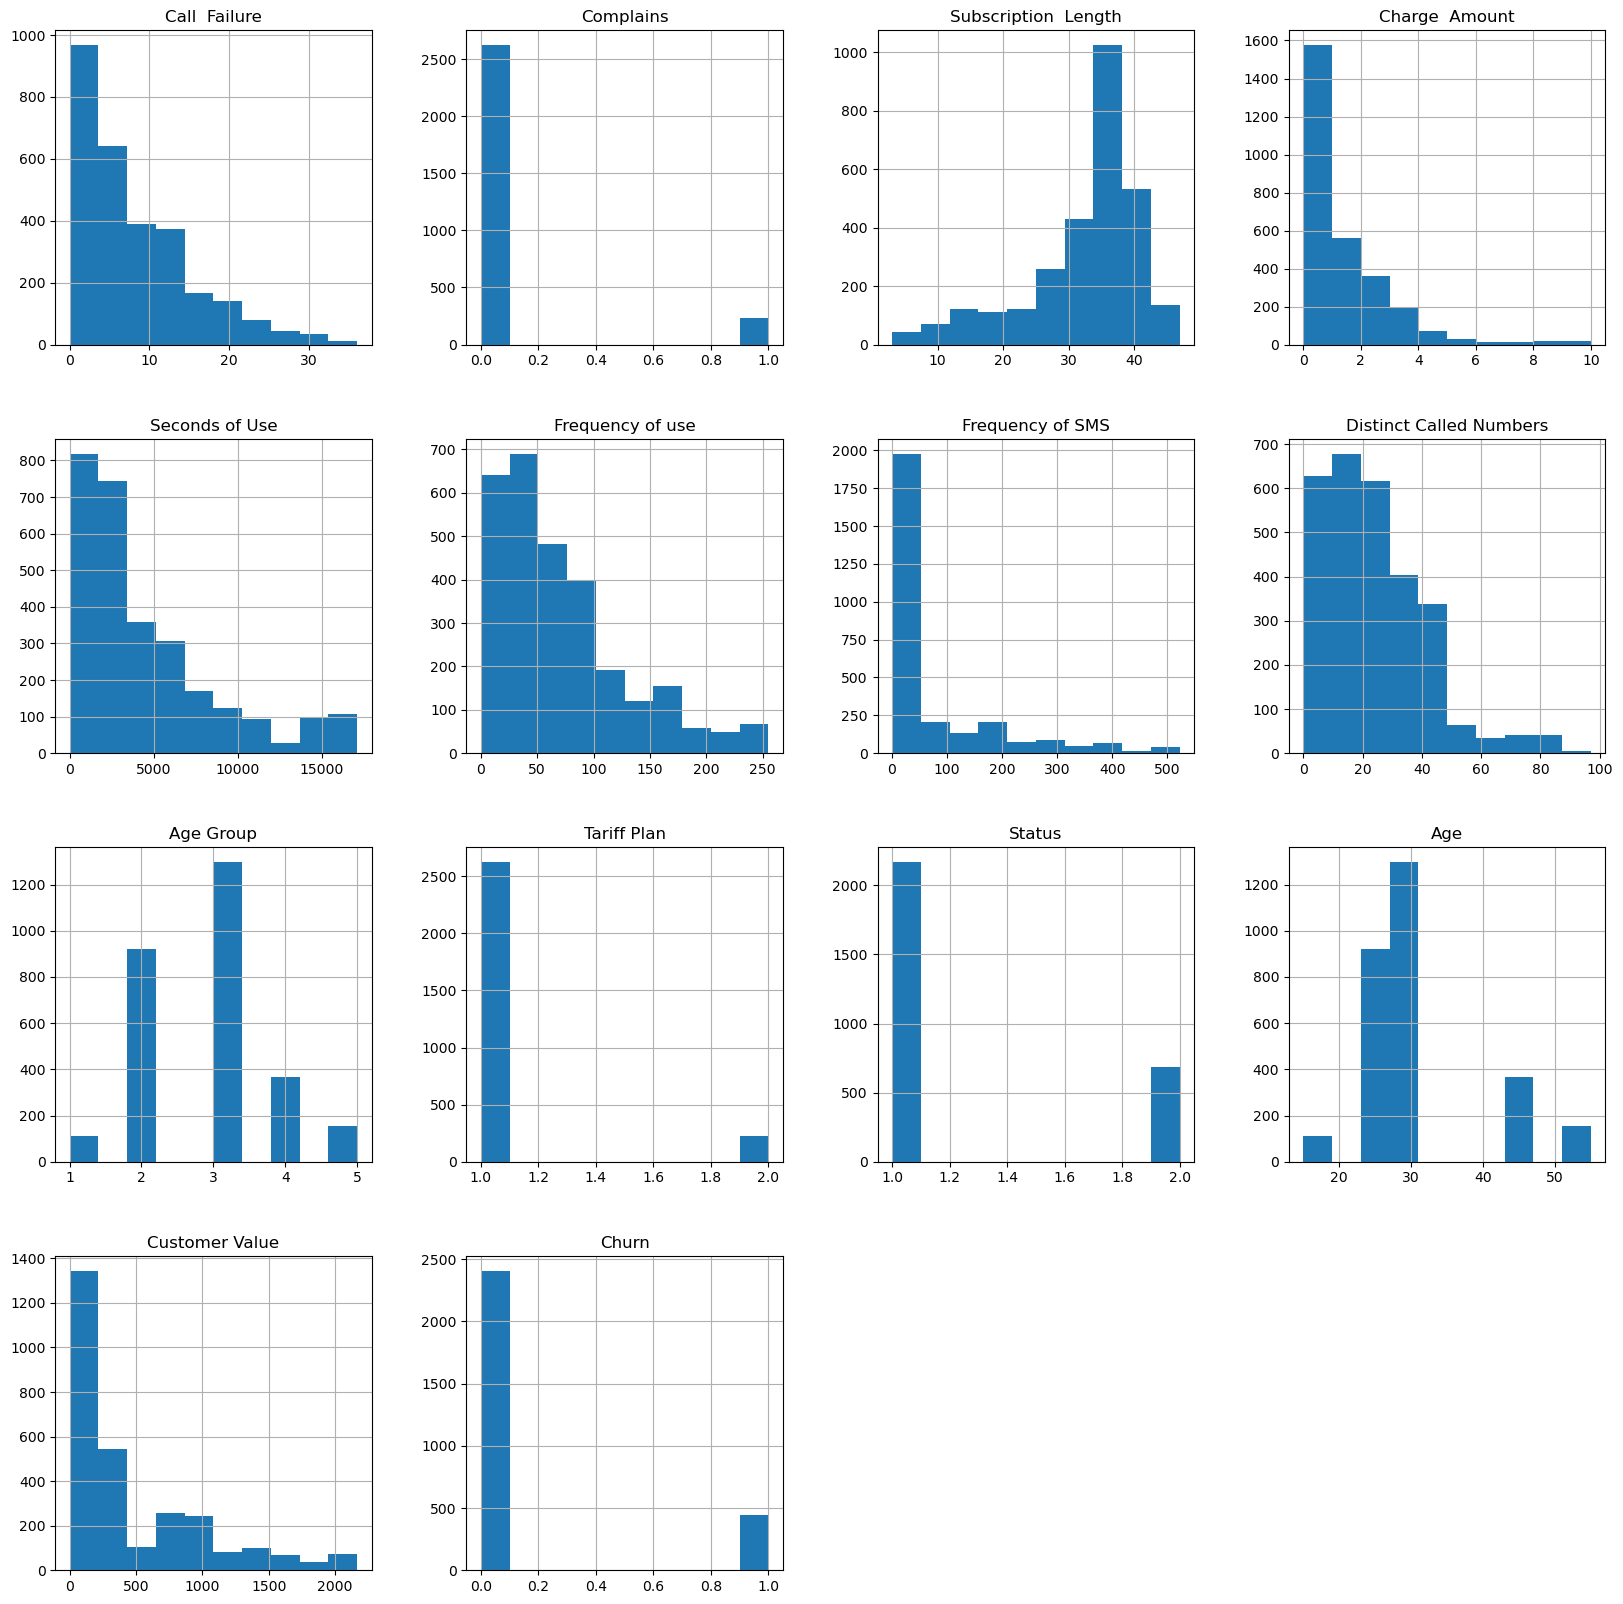

In [15]:
figure, axes = plt.subplots(figsize=(20, 20))
data.hist(ax=axes);

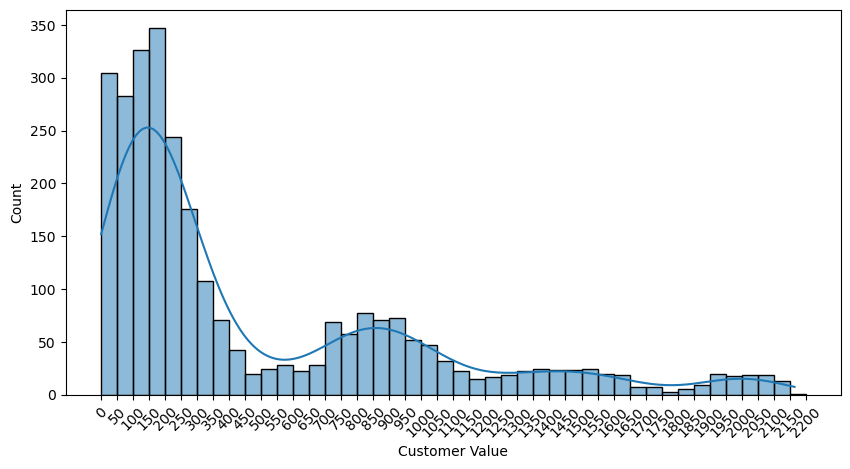

In [16]:
plt.figure(figsize=(10, 5))
bins = np.arange(0,data['Customer Value'].max()+50,50)
sns.histplot(data['Customer Value'],bins=bins,kde=True)
plt.xticks(ticks=bins,rotation=45);

#### we can use log transform to reduce the effect of skewness or outliers
* **as the outliers here aren't due to data entry errors, measurement errors, they represent valid extreme values that significantly deviate from the majority of the data .**

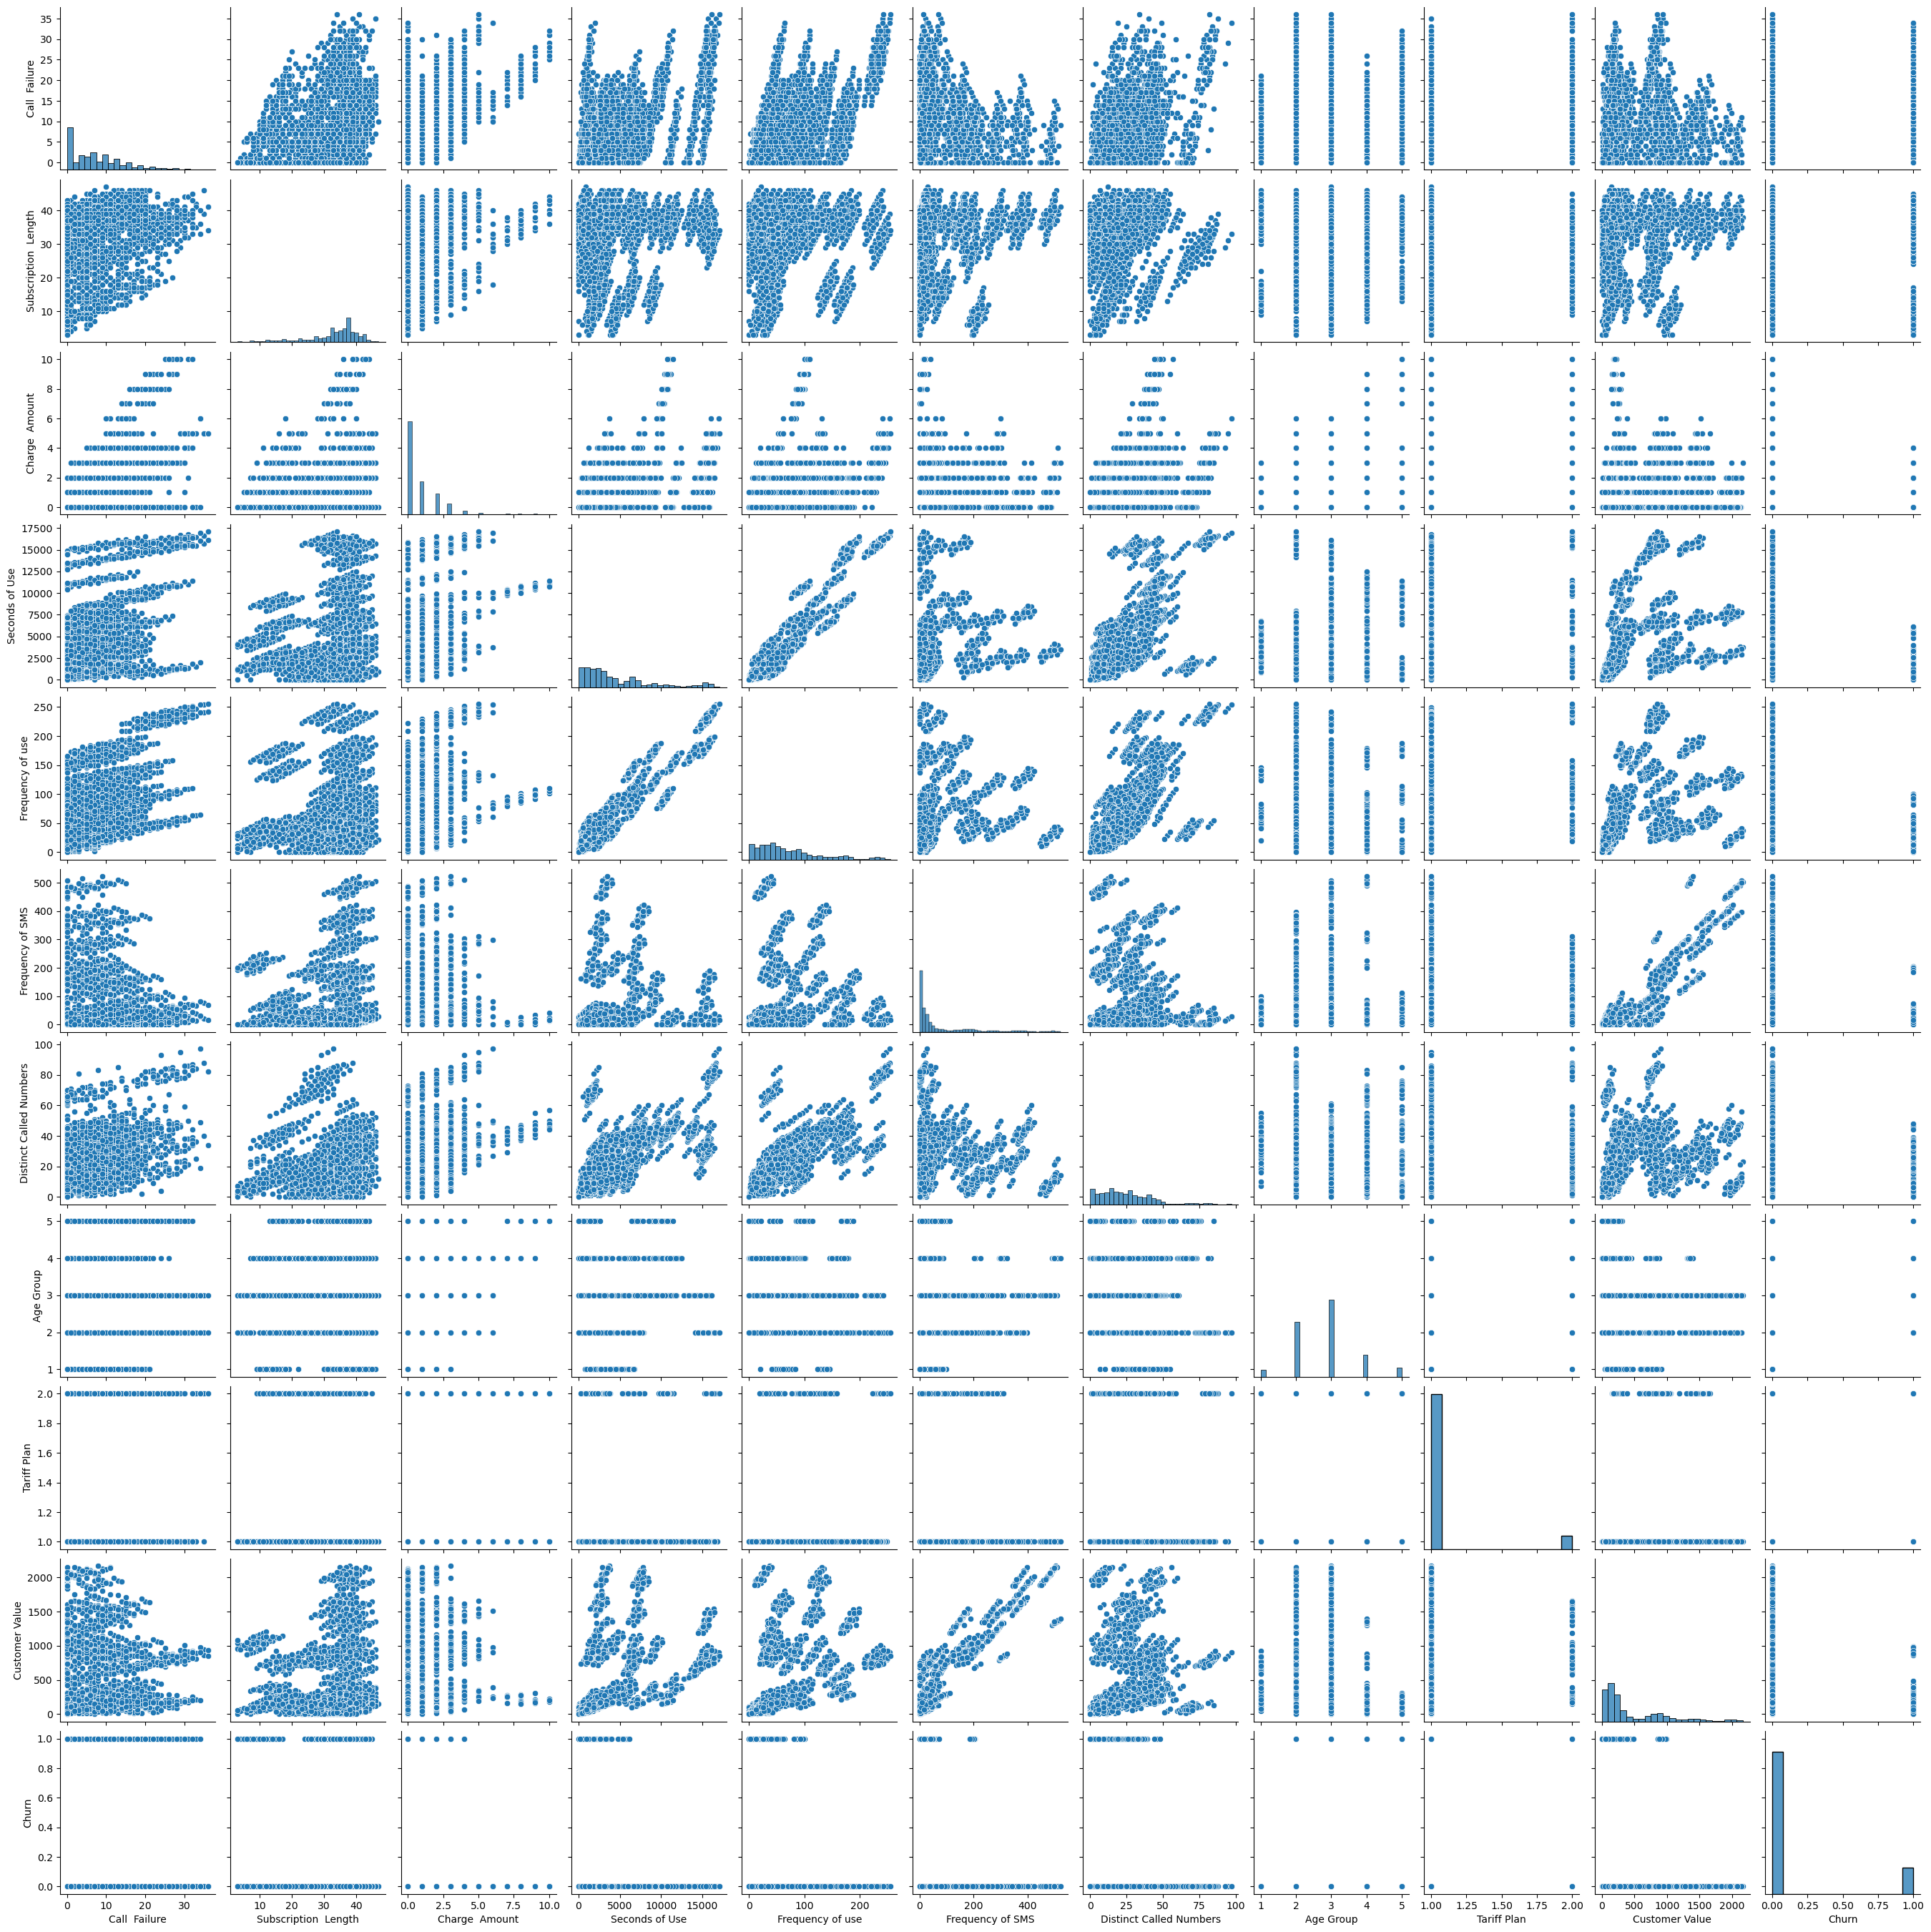

In [17]:
plt.figsize=(50, 50)
sns.pairplot(data.drop(['Complains','Status','Age'],axis=1));

In [18]:
len(data.columns)

14

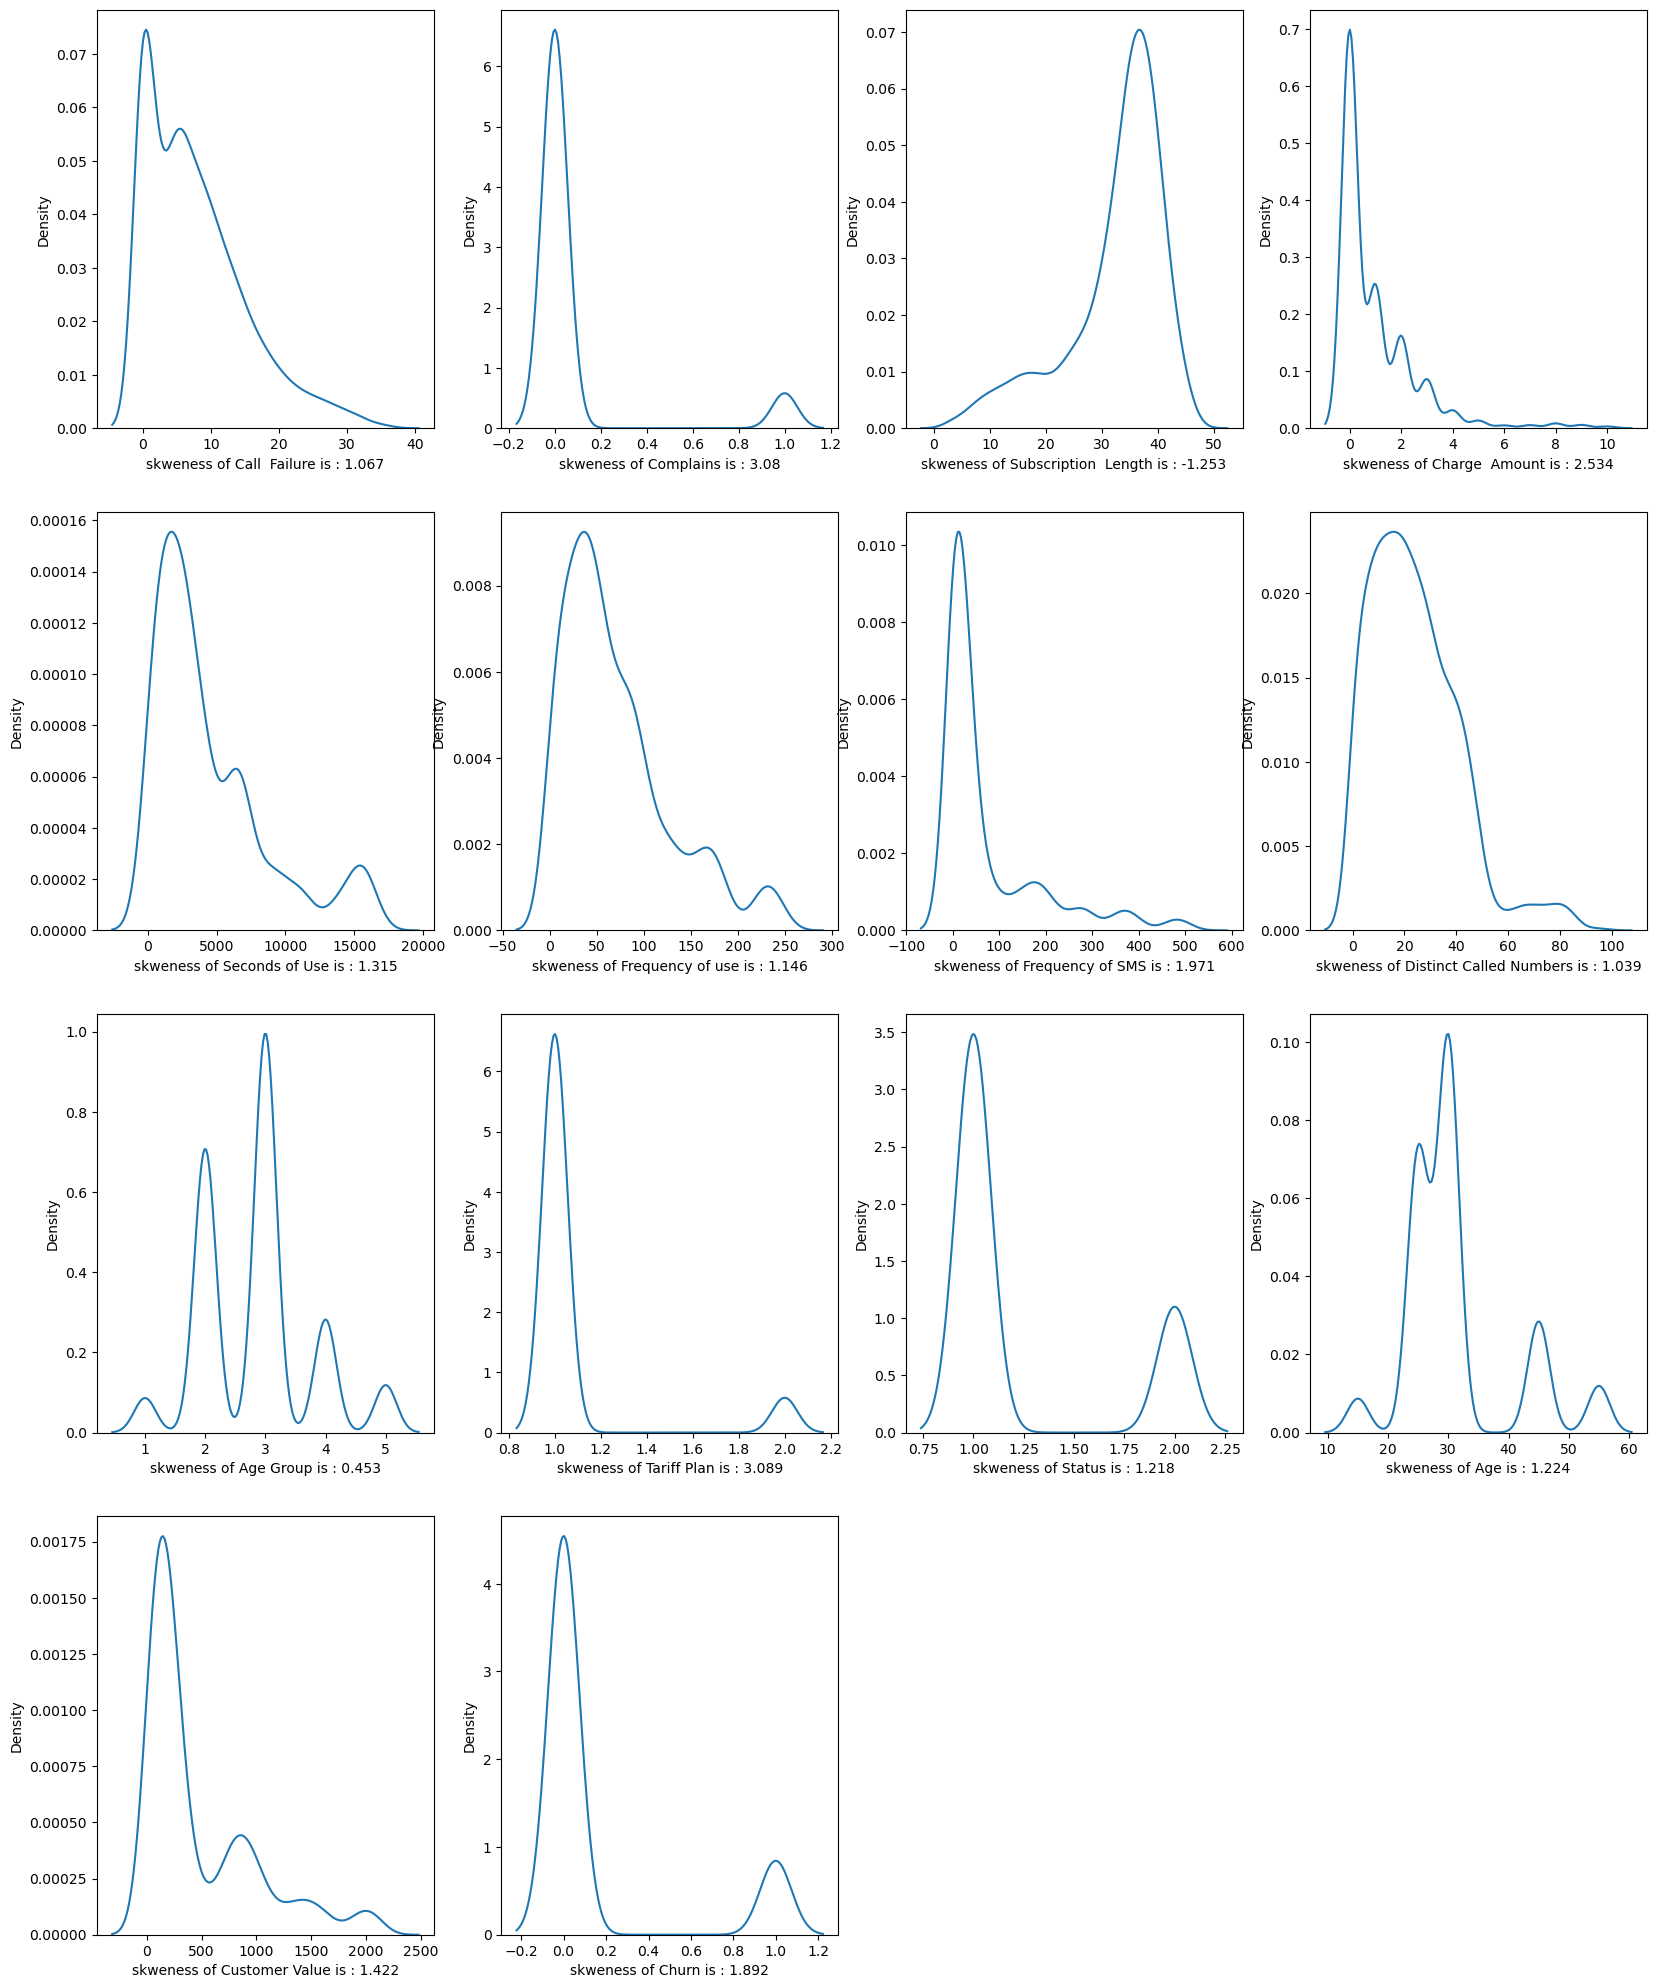

In [19]:
plt.figure(figsize=(20, 25))
i=1
for f in data.columns:
    plt.subplot(4,4,i)
    sns.kdeplot(data=data,x=f)
    i+=1
    plt.xlabel(f'skweness of {f} is : {round(data[f].skew(),3)}')

In [20]:
data_eng = data.copy()
data_eng = data_eng.drop('Age',axis=1)

In [21]:
data_eng[data_eng['Frequency of use']==0]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
18,0,0,37,0,0,0,0,0,2,1,2,0.0,1
118,0,0,35,0,0,0,0,0,2,1,2,0.0,1
128,0,1,34,0,0,0,0,0,3,1,2,0.0,1
132,0,0,34,0,0,0,0,0,5,1,1,0.0,0
201,0,0,35,0,0,0,0,0,2,1,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0,0,39,0,0,0,0,0,2,1,2,0.0,1
3001,0,0,40,0,0,0,0,0,3,1,2,0.0,0
3018,0,0,38,0,0,0,0,0,2,1,2,0.0,1
3028,0,0,37,0,0,0,0,0,3,1,2,0.0,1


we 'll combine the two features (Frequency of use,Seconds of Use) to overcome multicollinearity as they implies each other Seconds of Use are the total calls secounds and Frequency of use are the total calls of one customer
**we'll get new column named Average Call Duration and its formula = Minutes of Use / Frequency of Use**

In [22]:
data_eng['Average of use'] = (data_eng['Seconds of Use']/60)/data_eng['Frequency of use']
data_eng.drop(['Frequency of use','Seconds of Use'],axis=1,inplace=True)
data_eng.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,Average of use
0,8,0,38,0,5,17,3,1,1,197.640,0,1.025822
1,0,0,39,0,7,4,2,1,2,46.035,0,1.060000
2,10,0,37,0,359,24,3,1,1,1536.520,0,0.681389
3,10,0,38,0,1,35,1,1,1,240.020,0,1.060101
4,3,0,38,0,2,33,1,1,1,145.805,0,0.687644


In [23]:
data_eng['Average of use'] = data_eng['Average of use'].fillna(0)

In [24]:
continous_data = data_eng [['Customer Value' ,'Average of use']]
continous_data

,Customer Value,Average of use
0,197.640,1.025822
1,46.035,1.060000
2,1536.520,0.681389
3,240.020,1.060101
4,145.805,0.687644
...,...,...
3096,261.210,0.869774
3097,280.320,1.031699
3099,100.680,1.194667
3123,174.585,1.808081


Text(0.5, 0, 'skweness of Average of use = 4.07')

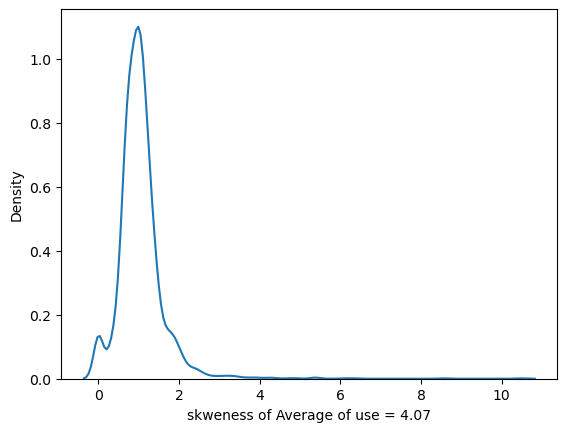

In [25]:
sns.kdeplot(data_eng['Average of use'])
plt.xlabel(f"skweness of Average of use = {round(data_eng['Average of use'].skew(),2)}")

In [26]:
data_eng['Average of use'] = np.log1p(data_eng['Average of use'])

Text(0.5, 0, 'skweness of Average of use = 0.24')

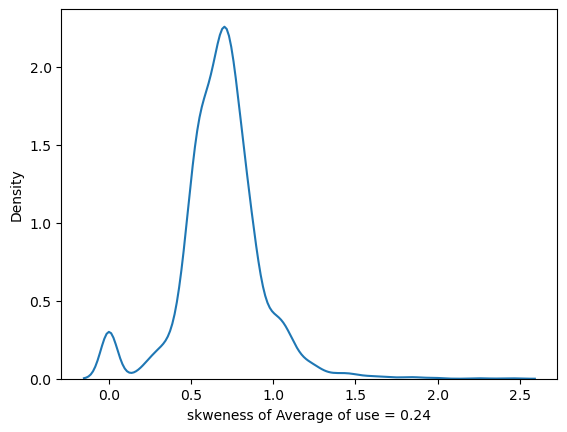

In [27]:
sns.kdeplot(data_eng['Average of use'])
plt.xlabel(f"skweness of Average of use = {round(data_eng['Average of use'].skew(),2)}")

##### splitting data_eng 

In [28]:
X = data_eng.drop(['Customer Value','Churn'],axis=1)
y1 = data_eng['Customer Value']
y2 = data_eng['Churn']
print(y1)
print(y2)
X

0        197.640
1         46.035
2       1536.520
3        240.020
4        145.805
          ...   
3096     261.210
3097     280.320
3099     100.680
3123     174.585
3131      63.650
Name: Customer Value, Length: 2850, dtype: float64
0       0
1       0
2       0
3       0
4       0
       ..
3096    0
3097    0
3099    1
3123    0
3131    1
Name: Churn, Length: 2850, dtype: int64


,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Average of use
0,8,0,38,0,5,17,3,1,1,0.705975
1,0,0,39,0,7,4,2,1,2,0.722706
2,10,0,37,0,359,24,3,1,1,0.519620
3,10,0,38,0,1,35,1,1,1,0.722755
4,3,0,38,0,2,33,1,1,1,0.523333
...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,80,42,5,1,1,0.625818
3097,13,0,18,4,38,21,3,1,1,0.708873
3099,8,1,11,2,7,9,3,1,1,0.786030
3123,26,0,38,9,8,44,5,2,1,1.032501


In [29]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

In [30]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1[['Average of use']])
X_train1['Average of use'] = scaler.transform(X_train1[['Average of use']])
X_test1['Average of use'] = scaler.transform(X_test1[['Average of use']])

scaler.fit(X_train2[['Average of use']])
X_train2['Average of use'] = scaler.transform(X_train2[['Average of use']])
X_test2['Average of use'] = scaler.transform(X_test2[['Average of use']])

In [64]:
print("Means: ",scaler.mean_)
print("Standard Deviations: ", scaler.scale_)

Means:  [0.68661658]
Standard Deviations:  [0.24996399]


Feature 1: Call  Failure - Score: 0.0062
Feature 2: Complains - Score: 0.1072
Feature 3: Subscription  Length - Score: 0.0159
Feature 4: Charge  Amount - Score: 0.0261
Feature 5: Frequency of SMS - Score: 0.0452
Feature 6: Distinct Called Numbers - Score: 0.0398
Feature 7: Age Group - Score: 0.0045
Feature 8: Tariff Plan - Score: 0.0085
Feature 9: Status - Score: 0.1002
Feature 10: Average of use - Score: 0.0604


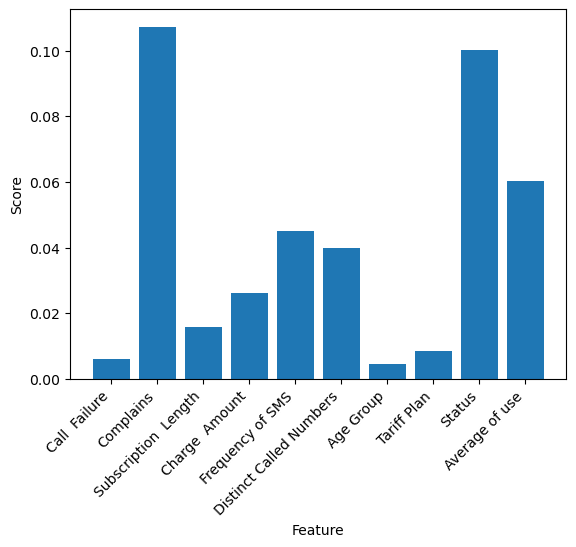

In [32]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def select_features(X_train2, y_train2, X_test2):
    """Selects features using mutual information and returns transformed data and scores.

    Args:
        X_train2 (numpy.ndarray): Training features data.
        y_train2 (numpy.ndarray): Training target labels.
        X_test2 (numpy.ndarray): Testing features data.

    Returns:
        tuple: A tuple containing the transformed training features (X_train_fs),
               transformed testing features (X_test_fs), and the feature selector object (fs).
    """

    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train2, y_train2)

    X_train_fs = fs.transform(X_train2)
    X_test_fs = fs.transform(X_test2)

    # Get feature names from the SelectKBest object
    feature_names = fs.feature_names_in_

    # Print feature scores with names
    for i, (name, score) in enumerate(zip(feature_names, fs.scores_)):
        print(f"Feature {i+1}: {name} - Score: {score:.4f}")

    # Plot the scores with feature names as labels
    plt.bar(feature_names, fs.scores_)
    plt.xlabel("Feature")
    plt.ylabel("Score")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    return X_train_fs, X_test_fs, fs

# Example usage (assuming you have your data)
X_train_fs, X_test_fs, fs = select_features(X_train2, y_train2, X_test2)

##### Most Important Features:

* Feature 9 (Status): This feature has the highest score, suggesting it has the strongest relationship with the target variable. It likely represents a significant factor in determining customer satisfaction or churn.

* Feature 2 (Complains): Customers who file more complaints are more likely to be dissatisfied or churn, indicated by the high score.


###### Moderately Important Features:

* Feature 10 (Average of use): Customers with a high average usage may have different satisfaction levels or churn rates compared to those with low usage.

* Feature 5 (Frequency of SMS): The frequency of SMS usage might be related to customer satisfaction or churn, but the relationship is less strong than for the top features.

***********************************************************************
##### Less Important Features:

* Feature 1 (Call Failure): Despite being a common issue, call failures do not have a significant impact on the target variable.

* Feature 3 (Subscription Length): Subscription length may have a weaker relationship with the target variable compared to other features.

* Feature 4 (Charge Amount): The amount charged to customers has a moderate impact on the target variable.

* Feature 6 (Distinct Called Numbers): The diversity of called numbers has a relatively weak relationship with the target variable.
* Feature 7 (Age Group): Age group may not be a strong predictor of the target variable in this dataset.
* Feature 8 (Tariff Plan): The tariff plan chosen by customers has a limited impact on the target variable.

##### regressor model selection for knowing the equation of customer value 

In [33]:
#import Evaluation metrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# import Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso ,Ridge

regressors = {'randomForestRegressor': RandomForestRegressor(random_state=42),'decisionTreeRegressor':DecisionTreeRegressor(random_state=42),'sVR':SVR(),'lasso':Lasso(random_state=42),'ridge':Ridge(random_state=42)}

results = {}

# Loop over each regressor
for name, regressor in regressors.items():
    # Fit the model
    regressor.fit(X_train1, y_train1)
    
    # Predict on the training set
    y_train_pred = regressor.predict(X_train1)
    
    # Predict on the test set
    y_test_pred = regressor.predict(X_test1)
    
    # Calculate evaluation metrics for the training set
    mae_train = mean_absolute_error(y_train1, y_train_pred)
    mse_train = mean_squared_error(y_train1, y_train_pred)
    r2_train = r2_score(y_train1, y_train_pred)

    # Calculate evaluation metrics for the test set
    mae_test = mean_absolute_error(y_test1, y_test_pred)
    mse_test = mean_squared_error(y_test1, y_test_pred)
    r2_test = r2_score(y_test1, y_test_pred)
    
    # Store the results in a dictionary
    results[name] = {
        'MAE Train': mae_train,
        'MSE Train': mse_train,
        'R2 Score Train': r2_train,
        'MAE Test': mae_test,
        'MSE Test': mse_test,
        'R2 Score Test': r2_test
    }


In [34]:
results

{'randomForestRegressor': {'MAE Train': 8.755969364035098,
  'MSE Train': 266.1786523629986,
  'R2 Score Train': 0.9989996221831623,
  'MAE Test': 25.293476315789484,
  'MSE Test': 2374.648066979316,
  'R2 Score Test': 0.9908124631104039},
 'decisionTreeRegressor': {'MAE Train': 0.0,
  'MSE Train': 0.0,
  'R2 Score Train': 1.0,
  'MAE Test': 33.31980701754386,
  'MSE Test': 5248.1618664912285,
  'R2 Score Test': 0.979694809760886},
 'sVR': {'MAE Train': 198.23837028983272,
  'MSE Train': 111438.33244933734,
  'R2 Score Train': 0.5811819064450179,
  'MAE Test': 197.54342825931323,
  'MSE Test': 106338.81593901293,
  'R2 Score Test': 0.5885740679550742},
 'lasso': {'MAE Train': 90.9559896345985,
  'MSE Train': 18078.499517922697,
  'R2 Score Train': 0.9320556711859154,
  'MAE Test': 92.18604827420756,
  'MSE Test': 17505.166919275493,
  'R2 Score Test': 0.9322723358186024},
 'ridge': {'MAE Train': 91.66369314119886,
  'MSE Train': 18033.110543975126,
  'R2 Score Train': 0.932226256325869

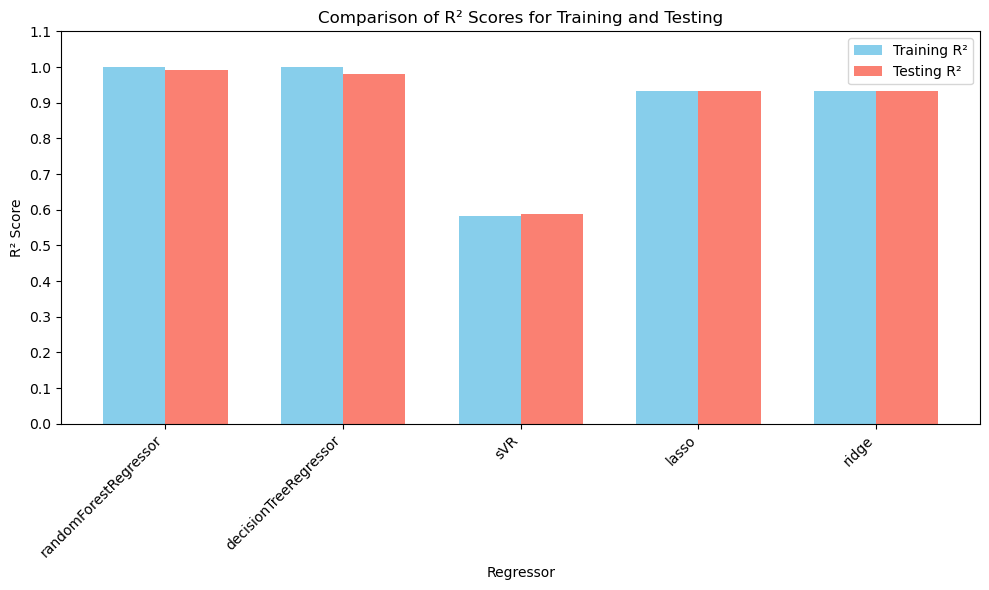

In [35]:
import matplotlib.pyplot as plt

# Extract R² scores for training and testing
regressor_names = list(results.keys())
r2_train_scores = [results[name]['R2 Score Train'] for name in regressor_names]
r2_test_scores = [results[name]['R2 Score Test'] for name in regressor_names]

# Plotting the side-by-side bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for each bar on the x-axis
x = np.arange(len(regressor_names))

# Bar width
bar_width = 0.35

# Plot training R² scores
ax.bar(x - bar_width/2, r2_train_scores, width=bar_width, label='Training R²', color='skyblue')
# Plot testing R² scores
ax.bar(x + bar_width/2, r2_test_scores, width=bar_width, label='Testing R²', color='salmon')

# Add labels and title
ax.set_xlabel('Regressor')
ax.set_ylabel('R² Score')
ax.set_title('Comparison of R² Scores for Training and Testing')
ax.set_xticks(x)
ax.set_xticklabels(regressor_names, rotation=45, ha='right')
ax.legend()
plt.yticks(np.arange(0,1.2,0.1))

# Display the plot
plt.tight_layout()
plt.show()

#### classifyiers model selection for classification of customer churn

In [36]:
# importing Evaluation Metrix
from sklearn.metrics import f1_score, accuracy_score

# importing classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier , LogisticRegression
results = {}

clssifiers = {
    'randomForestClassifier': RandomForestClassifier(random_state=42),
    'decisionTreeClassifier':DecisionTreeClassifier(random_state=42),
    'sVC':SVC(random_state=42),
    'ridgeClassifier':RidgeClassifier(random_state=42),
    'logisticRegression':LogisticRegression(random_state=42,max_iter=1000)
}


# Loop over each clssifiers
for name, clssifier in clssifiers.items():
    # Fit the model
    clssifier.fit(X_train2, y_train2)
    
    # Predict on the training set
    y_train_pred = clssifier.predict(X_train2)
    
    # Predict on the test set
    y_test_pred = clssifier.predict(X_test2)
    
    # Calculate evaluation metrics for the training set
    f1_scoree_train = f1_score(y_train2, y_train_pred)
    accuracy_scoree_train = accuracy_score(y_train2, y_train_pred)

    # Calculate evaluation metrics for the test set
    f1_scoree_test = f1_score(y_test2, y_test_pred)
    accuracy_scoree_test = accuracy_score(y_test2, y_test_pred)
    
    # Store the results in a dictionary
    results[name] = {
        'F1 Score Train': f1_scoree_train,
        'Accuracy Train': accuracy_scoree_train,
        'F1 Score Test': f1_scoree_test,
        'Accuracy Test': accuracy_scoree_test
    }



In [38]:
results

{'randomForestClassifier': {'F1 Score Train': 0.9887640449438203,
  'Accuracy Train': 0.9964912280701754,
  'F1 Score Test': 0.8098159509202454,
  'Accuracy Test': 0.9456140350877194},
 'decisionTreeClassifier': {'F1 Score Train': 0.9886039886039886,
  'Accuracy Train': 0.9964912280701754,
  'F1 Score Test': 0.8111111111111112,
  'Accuracy Test': 0.9403508771929825},
 'sVC': {'F1 Score Train': 0.0,
  'Accuracy Train': 0.8442982456140351,
  'F1 Score Test': 0.0,
  'Accuracy Test': 0.8403508771929824},
 'ridgeClassifier': {'F1 Score Train': 0.5746691871455576,
  'Accuracy Train': 0.9013157894736842,
  'F1 Score Test': 0.5547445255474454,
  'Accuracy Test': 0.8929824561403509},
 'logisticRegression': {'F1 Score Train': 0.5985915492957745,
  'Accuracy Train': 0.9,
  'F1 Score Test': 0.5540540540540542,
  'Accuracy Test': 0.8842105263157894}}

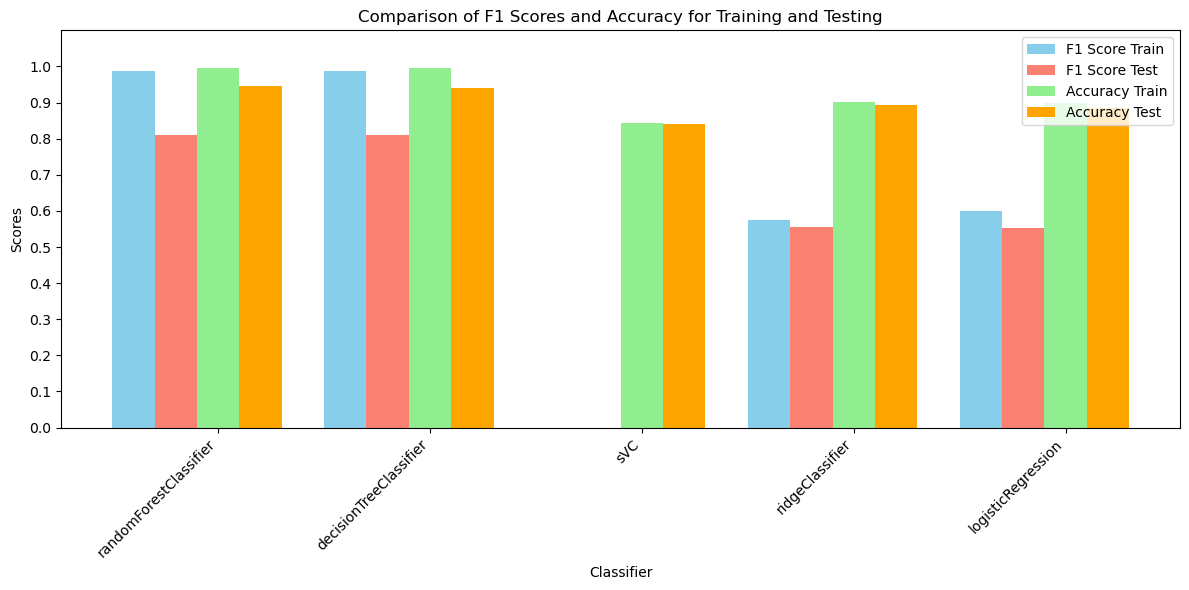

In [39]:
import matplotlib.pyplot as plt
import numpy as np


# Extract F1 scores and accuracies for training and testing
classifier_names = list(results.keys())
# Ensure you're using the correct keys based on your results dictionary
f1_train_scores = [results[name]['F1 Score Train'] for name in classifier_names]
f1_test_scores = [results[name]['F1 Score Test'] for name in classifier_names]
accuracy_train_scores = [results[name]['Accuracy Train'] for name in classifier_names]
accuracy_test_scores = [results[name]['Accuracy Test'] for name in classifier_names]

# Plotting the side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define positions for each bar on the x-axis
x = np.arange(len(classifier_names))

# Bar width
bar_width = 0.2

# Plot training F1 scores
ax.bar(x - bar_width, f1_train_scores, width=bar_width, label='F1 Score Train', color='skyblue')
# Plot testing F1 scores
ax.bar(x, f1_test_scores, width=bar_width, label='F1 Score Test', color='salmon')
# Plot training Accuracy scores
ax.bar(x + bar_width, accuracy_train_scores, width=bar_width, label='Accuracy Train', color='lightgreen')
# Plot testing Accuracy scores
ax.bar(x + 2 * bar_width, accuracy_test_scores, width=bar_width, label='Accuracy Test', color='orange')

# Add labels and title
ax.set_xlabel('Classifier')
ax.set_ylabel('Scores')
ax.set_title('Comparison of F1 Scores and Accuracy for Training and Testing')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(classifier_names, rotation=45, ha='right')
ax.legend()
plt.ylim(0, 1.1)  # Set y-axis limits
plt.yticks(np.arange(0,1.1,0.1))

# Display the plot
plt.tight_layout()
plt.show()


The random forest classifier and decision tree classifier generally outperform the other classifiers in terms of both F1 score and accuracy, especially on the training data_eng. Training vs. testing: In most cases, the performance on the training data_eng is slightly higher than on the testing data_eng, indicating some level of overfitting. we can fine tune to reduce over fitting

###### we can fine-tune a Decision Tree model and then use the optimized hyperparameters as a starting point for tuning a Random Forest model.

In [40]:
from sklearn.model_selection import learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# It is good to randomize the data before drawing Learning Curves


def draw_learning_curves(X, y, estimator, num_trainings):#10
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes =np.linspace(.1, 1.0, num_trainings)) #[0.1,0.2,0.3...1] *80
    print("train score:\n",train_scores)
    print()
    print("train size :\n",train_sizes)
    print()
    train_scores_mean = np.mean(train_scores, axis=1) # for rows
    print("train score mean:\n",train_scores_mean)
    print()
    print("test_score: \n",test_scores)
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)
    print("test score mean:\n",test_scores_mean)
    print()
    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train score:
 [[0.90350877 0.89473684 0.89473684 0.89473684 0.89473684]
 [0.89254386 0.9122807  0.9122807  0.9122807  0.9122807 ]
 [0.89181287 0.90497076 0.90789474 0.90789474 0.90789474]
 [0.89254386 0.90350877 0.90789474 0.90789474 0.90789474]
 [0.89473684 0.90350877 0.90350877 0.89912281 0.89912281]
 [0.89108187 0.89839181 0.89692982 0.90131579 0.90131579]
 [0.89724311 0.90288221 0.90100251 0.90100251 0.90100251]
 [0.89747807 0.90241228 0.90131579 0.90076754 0.89638158]
 [0.89619883 0.9005848  0.90107212 0.89961014 0.89912281]
 [0.89736842 0.90131579 0.90087719 0.9        0.9       ]]

train size :
 [ 228  456  684  912 1140 1368 1596 1824 2052 2280]

train score mean:
 [0.89649123 0.90833333 0.90409357 0.90394737 0.9        0.89780702
 0.90062657 0.89967105 0.89931774 0.89991228]

test_score: 
 [[0.90350877 0.89473684 0.90175439 0.89122807 0.8877193 ]
 [0.91403509 0.89824561 0.9        0.89824561 0.90350877]
 [0.91403509 0.89473684 0.9        0.89824561 0.9       ]
 [0.91052632 0.8

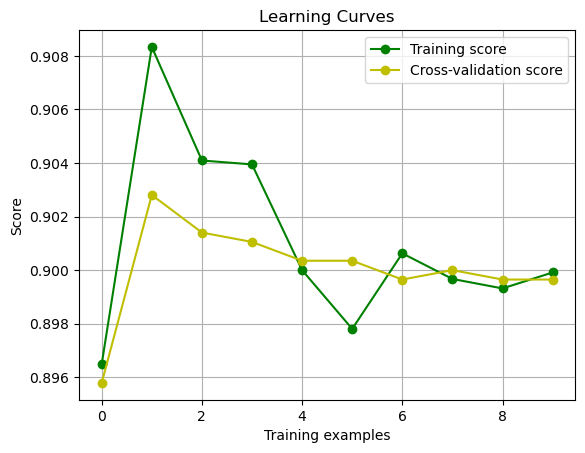

In [40]:
draw_learning_curves(X,y2,RidgeClassifier(random_state=42),10)

train score:
 [[1.         0.99561404 0.99561404 0.99561404 0.99561404]
 [1.         0.99561404 0.99561404 0.99561404 0.99561404]
 [1.         0.99707602 0.99707602 0.99707602 0.99707602]
 [0.99561404 0.99342105 0.99780702 0.99780702 0.99780702]
 [0.99649123 0.99473684 0.99473684 0.99473684 0.99473684]
 [0.99707602 0.99561404 0.99561404 0.99342105 0.99342105]
 [0.99749373 0.9962406  0.9962406  0.99310777 0.99310777]
 [0.99725877 0.99616228 0.99616228 0.9939693  0.9939693 ]
 [0.99756335 0.99610136 0.99610136 0.99415205 0.99463938]
 [0.99736842 0.99649123 0.99605263 0.99429825 0.99473684]]

train size :
 [ 228  456  684  912 1140 1368 1596 1824 2052 2280]

train score mean:
 [0.99649123 0.99649123 0.99766082 0.99649123 0.99508772 0.99502924
 0.9952381  0.99550439 0.9957115  0.99578947]

test_score: 
 [[0.89122807 0.88947368 0.89298246 0.88070175 0.8754386 ]
 [0.91578947 0.90701754 0.91929825 0.88947368 0.88245614]
 [0.91754386 0.91929825 0.91929825 0.90877193 0.9122807 ]
 [0.92631579 0.9

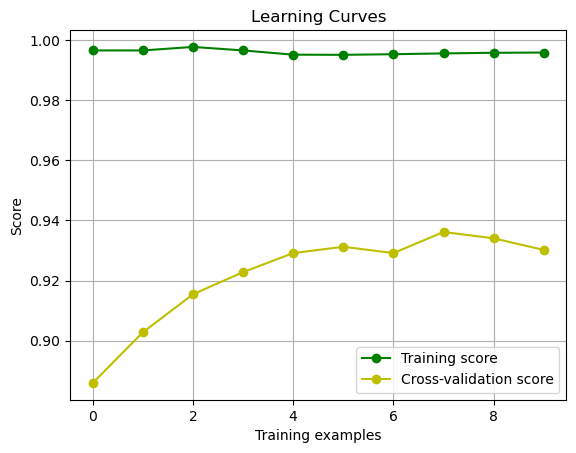

In [41]:
draw_learning_curves(X,y2,DecisionTreeClassifier(random_state=42),10)

train score:
 [[1.         0.99561404 0.99561404 0.99561404 0.99561404]
 [1.         0.99561404 0.99561404 0.99561404 0.99561404]
 [1.         0.99707602 0.99707602 0.99707602 0.99707602]
 [0.99561404 0.99342105 0.99780702 0.99780702 0.99780702]
 [0.99649123 0.99473684 0.99385965 0.99385965 0.99385965]
 [0.99707602 0.99561404 0.99488304 0.99342105 0.99342105]
 [0.99749373 0.9962406  0.99561404 0.9924812  0.9924812 ]
 [0.99725877 0.99616228 0.99561404 0.99342105 0.99342105]
 [0.99756335 0.99610136 0.99610136 0.99415205 0.99463938]
 [0.99736842 0.99649123 0.99605263 0.99429825 0.99473684]]

train size :
 [ 228  456  684  912 1140 1368 1596 1824 2052 2280]

train score mean:
 [0.99649123 0.99649123 0.99766082 0.99649123 0.9945614  0.99488304
 0.99486216 0.99517544 0.9957115  0.99578947]

test_score: 
 [[0.92807018 0.91754386 0.91052632 0.92807018 0.91929825]
 [0.94736842 0.92280702 0.92807018 0.92280702 0.9245614 ]
 [0.94385965 0.93859649 0.92982456 0.92631579 0.94912281]
 [0.94912281 0.9

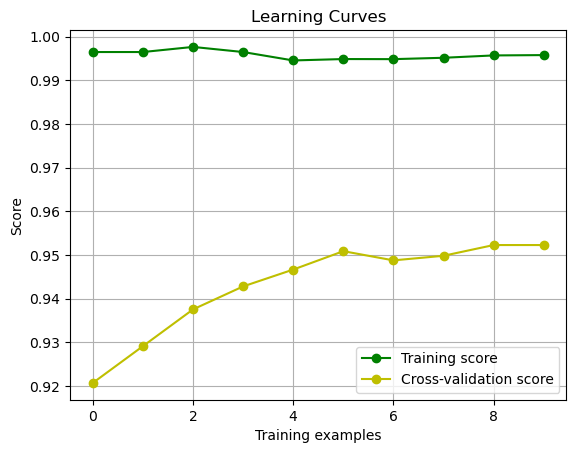

In [42]:
draw_learning_curves(X,y2,RandomForestClassifier(random_state=42),10)

train score:
 [[0.88157895 0.89473684 0.89473684 0.89473684 0.89473684]
 [0.87719298 0.89473684 0.89473684 0.89473684 0.89473684]
 [0.88596491 0.89327485 0.89912281 0.89912281 0.89912281]
 [0.89144737 0.89583333 0.89692982 0.89692982 0.89692982]
 [0.89561404 0.89736842 0.89649123 0.89385965 0.89385965]
 [0.88815789 0.88815789 0.89181287 0.89692982 0.89692982]
 [0.89536341 0.89786967 0.89411028 0.89724311 0.89724311]
 [0.89528509 0.89692982 0.89309211 0.89967105 0.89035088]
 [0.89327485 0.89278752 0.89181287 0.89668616 0.89522417]
 [0.89342105 0.89342105 0.89342105 0.89561404 0.89561404]]

train size :
 [ 228  456  684  912 1140 1368 1596 1824 2052 2280]

train score mean:
 [0.89210526 0.89122807 0.89532164 0.89561404 0.8954386  0.89239766
 0.89636591 0.89506579 0.89395712 0.89429825]

test_score: 
 [[0.90175439 0.88070175 0.88596491 0.89649123 0.88596491]
 [0.90350877 0.87719298 0.88596491 0.89649123 0.89649123]
 [0.90526316 0.88245614 0.89122807 0.88947368 0.89824561]
 [0.90350877 0.8

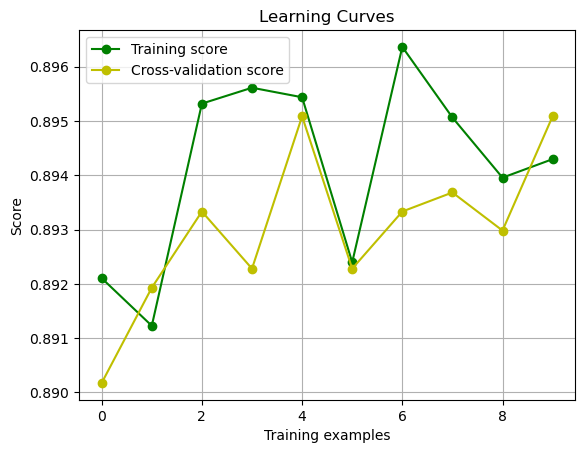

In [43]:
draw_learning_curves(X,y2,LogisticRegression(random_state=42,max_iter=10000),10)

we can fine tune on Decisiontree

In [44]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[1,2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10,12,16,18], 'min_samples_split':[2,4,6,8,10,12,14,16,18]}
cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train2, y_train2)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train2, y_train2)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train2)
best_test_predictions = best_clf.predict(X_test2)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train2))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test2))
train_accuracy = accuracy_score(y_train2, best_train_predictions)
test_accuracy = accuracy_score(y_test2,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.8914285714285715
The testing F1 Score is 0.7836257309941521
The training accuracy is 0.9666666666666667
The test accuracy is 0.9350877192982456


DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [45]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

###### then trying to tune the Random forest with common parameters with decision tree and it's addetional ensmble params

In [48]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
clf = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'n_estimators':[50,100,1000,10000,100000]}
cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train2, y_train2)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train2, y_train2)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train2)
best_test_predictions = best_clf.predict(X_test2)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train2))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test2))
train_accuracy = accuracy_score(y_train2, best_train_predictions)
test_accuracy = accuracy_score(y_test2,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.8849028400597907
The testing F1 Score is 0.8313253012048193
The training accuracy is 0.9662280701754385
The test accuracy is 0.9508771929824561


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=100000, random_state=42)

train score:
 [[0.92105263 0.92982456 0.92982456 0.92982456 0.92982456]
 [0.96710526 0.9495614  0.9495614  0.9495614  0.9495614 ]
 [0.96637427 0.96052632 0.95614035 0.95614035 0.95614035]
 [0.96381579 0.95942982 0.96600877 0.96600877 0.96600877]
 [0.96666667 0.9622807  0.96578947 0.96666667 0.96666667]
 [0.96929825 0.96418129 0.96856725 0.96418129 0.96418129]
 [0.96804511 0.96616541 0.96867168 0.96491228 0.96491228]
 [0.96436404 0.96381579 0.96491228 0.96655702 0.96655702]
 [0.96442495 0.96491228 0.96637427 0.96783626 0.96929825]
 [0.96666667 0.96798246 0.96754386 0.96929825 0.96535088]]

train size :
 [ 228  456  684  912 1140 1368 1596 1824 2052 2280]

train score mean:
 [0.92807018 0.95307018 0.95906433 0.96425439 0.96561404 0.96608187
 0.96654135 0.96524123 0.9665692  0.96736842]

test_score: 
 [[0.9245614  0.89824561 0.90701754 0.90877193 0.9122807 ]
 [0.93684211 0.91403509 0.9245614  0.91929825 0.9245614 ]
 [0.93684211 0.93859649 0.92982456 0.91929825 0.93859649]
 [0.93859649 0.9

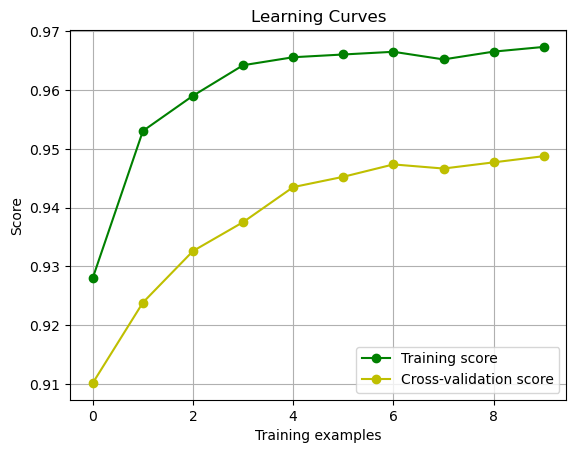

In [51]:
draw_learning_curves(X,y2,RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=100000, random_state=42),10)

grid search to fine-tune the RandomForestClassifier

In [48]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
clf = RandomForestClassifier(random_state=42,n_jobs=-1)

# the parameters list we wish to tune.
parameters = {'n_estimators':[50,100,1000,10000,100000],'max_depth':[1,2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10,12,16,18], 'min_samples_split':[2,4,6,8,10,12,14,16,18]}
cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
# Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

# Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train2, y_train2)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train2, y_train2)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train2)
best_test_predictions = best_clf.predict(X_test2)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train2))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test2))
train_accuracy = accuracy_score(y_train2, best_train_predictions)
test_accuracy = accuracy_score(y_test2,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.9044776119402986
The testing F1 Score is 0.8198757763975155
The training accuracy is 0.9719298245614035
The test accuracy is 0.9491228070175438


RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=42)

we 'll use the model {RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=42)} as it gives us the best model based on f1 score and to reduce impact of testing overfitting

In [49]:
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

train score:
 [[0.99122807 0.96052632 0.96052632 0.96052632 0.96052632]
 [0.98903509 0.97587719 0.97587719 0.97587719 0.97587719]
 [0.97953216 0.97953216 0.98245614 0.98245614 0.98245614]
 [0.97368421 0.97587719 0.98026316 0.98026316 0.98026316]
 [0.97807018 0.9745614  0.97631579 0.9754386  0.9754386 ]
 [0.97660819 0.97660819 0.9751462  0.97807018 0.97807018]
 [0.97117794 0.97305764 0.97431078 0.97305764 0.97305764]
 [0.96984649 0.97149123 0.97258772 0.97368421 0.97423246]
 [0.9702729  0.97173489 0.97222222 0.97222222 0.97465887]
 [0.97017544 0.97280702 0.97105263 0.97368421 0.97149123]]

train size :
 [ 228  456  684  912 1140 1368 1596 1824 2052 2280]

train score mean:
 [0.96666667 0.97850877 0.98128655 0.97807018 0.97596491 0.97690058
 0.97293233 0.97236842 0.97222222 0.97184211]

test_score: 
 [[0.93157895 0.90701754 0.91754386 0.92105263 0.92631579]
 [0.94035088 0.93157895 0.93859649 0.92631579 0.93157895]
 [0.94210526 0.94385965 0.93157895 0.92982456 0.94912281]
 [0.94210526 0.9

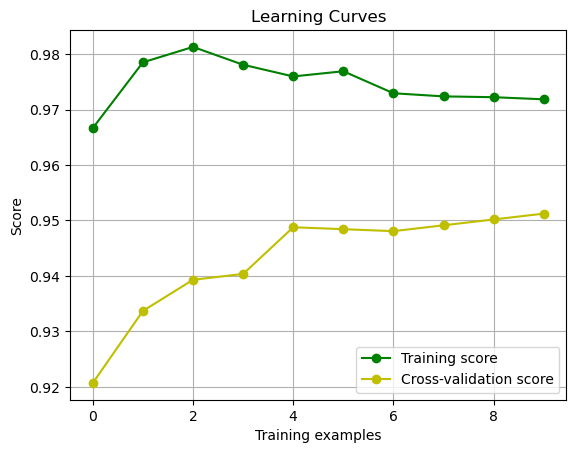

In [49]:
draw_learning_curves(X,y2,RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=100000, random_state=42),10)

train score:
 [[0.99122807 0.96491228 0.96491228 0.96491228 0.96491228]
 [0.98684211 0.97368421 0.97368421 0.97368421 0.97368421]
 [0.97953216 0.97807018 0.98391813 0.98391813 0.98391813]
 [0.9747807  0.97368421 0.98135965 0.98135965 0.98135965]
 [0.97631579 0.9745614  0.97631579 0.97807018 0.97807018]
 [0.97587719 0.97733918 0.9751462  0.97733918 0.97733918]
 [0.97243108 0.97305764 0.97368421 0.97368421 0.97368421]
 [0.96984649 0.97149123 0.97203947 0.97423246 0.97368421]
 [0.96978558 0.97222222 0.97270955 0.97368421 0.97368421]
 [0.96885965 0.97192982 0.97017544 0.975      0.97149123]]

train size :
 [ 228  456  684  912 1140 1368 1596 1824 2052 2280]

train score mean:
 [0.97017544 0.97631579 0.98187135 0.97850877 0.97666667 0.97660819
 0.97330827 0.97225877 0.97241715 0.97149123]

test_score: 
 [[0.93508772 0.91052632 0.91754386 0.9245614  0.9245614 ]
 [0.94210526 0.92807018 0.93684211 0.9245614  0.92982456]
 [0.94385965 0.94385965 0.93508772 0.93333333 0.94912281]
 [0.94385965 0.9

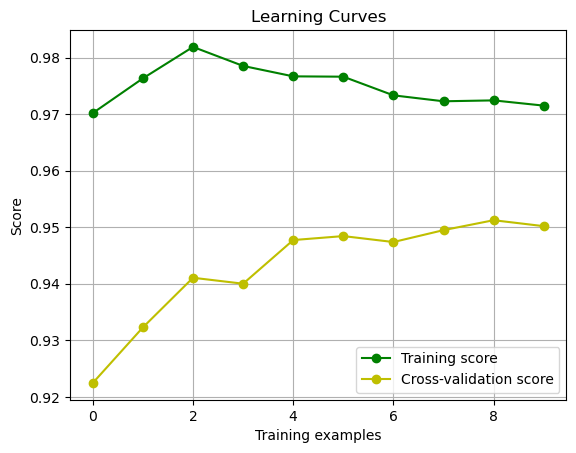

In [50]:
draw_learning_curves(X,y2,RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1000, random_state=42),10)

In [59]:
clf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1000 , random_state=42)
clf = clf.fit(X_train2 , y_train2)


In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Fit the model
clf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1000, random_state=42)
clf.fit(X_train2, y_train2)

# Make predictions
train_predict = clf.predict(X_train2)
test_predict = clf.predict(X_test2)

# Calculate the scores
train_f1 = f1_score(y_train2, train_predict)
test_f1 = f1_score(y_test2, test_predict)

train_precision = precision_score(y_train2, train_predict)
test_precision = precision_score(y_test2, test_predict)

train_recall = recall_score(y_train2, train_predict)
test_recall = recall_score(y_test2, test_predict)

train_accuracy = accuracy_score(y_train2, train_predict)
test_accuracy = accuracy_score(y_test2, test_predict)

# Print the scores
print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")
print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")
print(f"Train Recall: {train_recall}")
print(f"Test Recall: {test_recall}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train F1 Score: 0.9044776119402986
Test F1 Score: 0.8198757763975155
Train Precision: 0.9619047619047619
Test Precision: 0.9428571428571428
Train Recall: 0.8535211267605634
Test Recall: 0.7252747252747253
Train Accuracy: 0.9719298245614035
Test Accuracy: 0.9491228070175438


In [61]:
reg = RandomForestRegressor(random_state=42)
reg = reg.fit(X_train1,y_train1)

In [62]:
train_predict = reg.predict(X_train1)
test_predict = reg.predict(X_test1)

train_score = r2_score(y_train1 , train_predict)
test_score = r2_score(y_test1 , test_predict)

print("The Train R2 Score Is : " , train_score)
print("The Test R2 Score Is : " , test_score)

The Train R2 Score Is :  0.9989996221831623
The Test R2 Score Is :  0.9908124631104039


In [63]:
import joblib

# Save your regression and classification models
joblib.dump(reg, 'regression_model.pkl')
joblib.dump(clf, 'classification_model.pkl')

['classification_model.pkl']

##### we 'll cluster the Data to deeply analyze it 

In [85]:
Churned = data_eng[data_eng['Churn']==1].copy()
NotChurned = data_eng[data_eng['Churn']==0].copy()

we can apply elbow curve based on inertia WCSS

### Inertia (WCSS)
$$
\text{Inertia} = \sum_{i=0}^{n} \min_{\mu_j \in C}(||x_i - \mu_j||^2)
$$

\begin{align*}
&  (n) \text{ is the total number of data points.} \\
&  (x_i) \text{ represents each data point.} \\
&  (\mu_j) \text{ represents the centroid of the cluster to which } (x_i) \text{ belongs.} \\
&  (C) \text{ represents the set of all cluster centroids.}
\end{align*}



In [86]:
aChurned = np .array(Churned.iloc[:,:])
aChurned

array([[  0.        ,   0.        ,  37.        , ...,  40.005     ,
          1.        ,   0.71376647],
       [  0.        ,   0.        ,  37.        , ...,   0.        ,
          1.        ,   0.        ],
       [ 23.        ,   1.        ,  33.        , ..., 117.09      ,
          1.        ,   0.2916635 ],
       ...,
       [ 14.        ,   0.        ,  38.        , ..., 168.075     ,
          1.        ,   0.61932122],
       [  8.        ,   1.        ,  11.        , ..., 100.68      ,
          1.        ,   0.78603017],
       [  5.        ,   1.        ,  38.        , ...,  63.65      ,
          1.        ,   0.78670758]])

In [87]:
from sklearn.cluster import KMeans

def kmeans_wcss(num_clusters, x_vals):

    wcss_values = []
    for num in num_clusters:
        kmeans = KMeans(n_clusters = num, init = 'k-means++', random_state = 42)
        kmeans.fit(x_vals)
        wcss_values.append(kmeans.inertia_)  # WCSS represents within-cluster sum of squares

    return wcss_values

In [88]:
from sklearn.cluster import KMeans

num_clusters = [i for i in range(2, 13)]
wcss_valuesC = kmeans_wcss(num_clusters, aChurned)
wcss_valuesC

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

[3865206.1690266076,
 1526890.9335123028,
 812736.1331510615,
 511756.97265263397,
 384488.7528211286,
 307754.51067288744,
 260730.187347385,
 224940.52198828387,
 206587.4756974359,
 189709.72286775208,
 175916.12734831427]

Text(0, 0.5, 'WCSS')

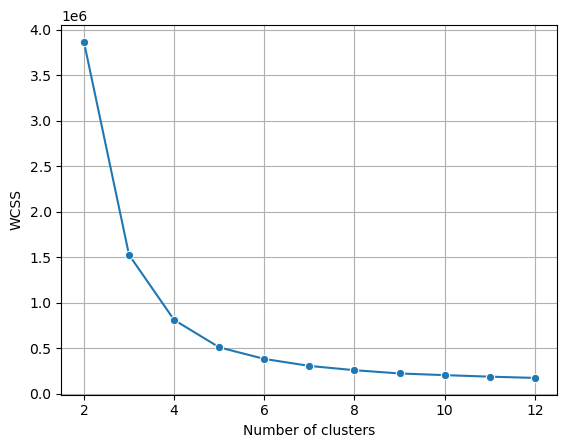

In [89]:
#elbow curve
plot = sns.lineplot(x=num_clusters, y=wcss_valuesC, marker = 'o')
plt.grid(True)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("WCSS")

In [90]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeanschurned = kmeans.fit_predict(aChurned)
print(len(y_kmeanschurned))
y_kmeanschurned # you have 5 clusters from 0 to 4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


446


array([1, 1, 0, 3, 0, 3, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 3, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 3, 0, 3, 1, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1,
       0, 3, 0, 1, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 2,
       0, 1, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 3, 0, 0, 3, 0, 1, 3, 1, 0, 1,
       1, 1, 0, 3, 3, 3, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 3, 1,
       1, 2, 0, 1, 3, 0, 0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 2, 1, 1, 0, 0, 3, 1, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 3,
       1, 2, 1, 1, 1, 3, 0, 0, 1, 2, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 3, 0,
       0, 1, 1, 1, 1, 0, 3, 0, 3, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3,
       1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 3, 0, 3, 1, 1, 1, 1, 3,
       0, 0, 1, 1, 1, 1, 0, 3, 3, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       3, 3, 3, 0, 0, 0, 1, 3, 0, 1, 1, 1, 0, 3, 0, 3, 1, 1, 1, 1, 3, 0,
       0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 3,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1,

In [91]:
Churned['cluster'] = kmeans.labels_
Churned

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,Average of use,cluster
16,0,0,37,0,0,11,2,1,2,40.005,1,0.713766,1
18,0,0,37,0,0,0,2,1,2,0.000,1,0.000000,1
22,23,1,33,0,16,17,2,1,2,117.090,1,0.291663,0
24,13,1,36,1,26,24,2,1,1,383.220,1,0.687861,3
26,9,0,35,0,9,16,3,1,2,157.240,1,0.795454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,2,1,10,1,0,9,3,1,1,43.840,1,0.827720,1
3072,28,1,35,0,23,19,3,1,2,144.520,1,0.333773,0
3077,14,0,38,0,41,33,4,1,2,168.075,1,0.619321,0
3099,8,1,11,2,7,9,3,1,1,100.680,1,0.786030,0


In [100]:
Churned.to_csv('Churned.csv',index=False)

and also for non churned 

In [92]:
aNotChurned = np.array(NotChurned.iloc[:,:])
aNotChurned

array([[8.00000000e+00, 0.00000000e+00, 3.80000000e+01, ...,
        1.97640000e+02, 0.00000000e+00, 7.05975345e-01],
       [0.00000000e+00, 0.00000000e+00, 3.90000000e+01, ...,
        4.60350000e+01, 0.00000000e+00, 7.22705983e-01],
       [1.00000000e+01, 0.00000000e+00, 3.70000000e+01, ...,
        1.53652000e+03, 0.00000000e+00, 5.19620171e-01],
       ...,
       [1.70000000e+01, 0.00000000e+00, 1.70000000e+01, ...,
        2.61210000e+02, 0.00000000e+00, 6.25817574e-01],
       [1.30000000e+01, 0.00000000e+00, 1.80000000e+01, ...,
        2.80320000e+02, 0.00000000e+00, 7.08872559e-01],
       [2.60000000e+01, 0.00000000e+00, 3.80000000e+01, ...,
        1.74585000e+02, 0.00000000e+00, 1.03250126e+00]])

In [93]:
num_clusters = [i for i in range(2, 13)]
wcss_valuesN = kmeans_wcss(num_clusters, aNotChurned)
wcss_valuesN

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable

[187787774.954139,
 66634720.68001896,
 43725496.33259473,
 30041233.699860726,
 20927533.920988243,
 17227165.657371603,
 13995872.284446687,
 11879015.606092645,
 10219465.681995953,
 9145465.894233717,
 8404911.4343785]

Text(0, 0.5, 'WCSS')

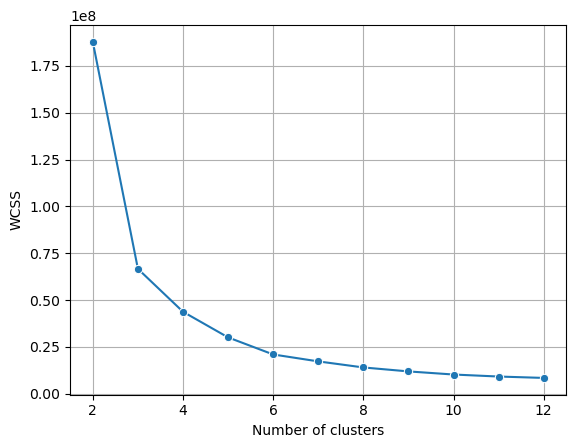

In [94]:
#elbow curve
plot = sns.lineplot(x=num_clusters, y=wcss_valuesN, marker = 'o')
plt.grid(True)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("WCSS")

In [95]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeansNchurned = kmeans.fit_predict(aNotChurned)
print(len(aNotChurned))
y_kmeansNchurned # you have 5 clusters from 0 to 4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


2404


array([0, 0, 1, ..., 0, 0, 0])

In [96]:
NotChurned['cluster'] = y_kmeansNchurned
NotChurned

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,Average of use,cluster
0,8,0,38,0,5,17,3,1,1,197.640,0,0.705975,0
1,0,0,39,0,7,4,2,1,2,46.035,0,0.722706,0
2,10,0,37,0,359,24,3,1,1,1536.520,0,0.519620,1
3,10,0,38,0,1,35,1,1,1,240.020,0,0.722755,0
4,3,0,38,0,2,33,1,1,1,145.805,0,0.523333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,30,0,40,4,61,34,3,1,1,871.040,0,0.748751,3
3095,21,0,19,2,92,44,2,2,1,721.980,0,0.564914,3
3096,17,0,17,1,80,42,5,1,1,261.210,0,0.625818,0
3097,13,0,18,4,38,21,3,1,1,280.320,0,0.708873,0


In [98]:
NotChurned.to_csv('NotChurned.csv', index=False)